In [26]:
# Import required libraries and dependencies
import pandas as pd
##import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 40.6 MB/s eta 0:00:00


In [4]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv("crypto_market_data.csv",index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [5]:
# Generate summary statistics
df_describe = df_market_data.describe()
df_describe
#df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


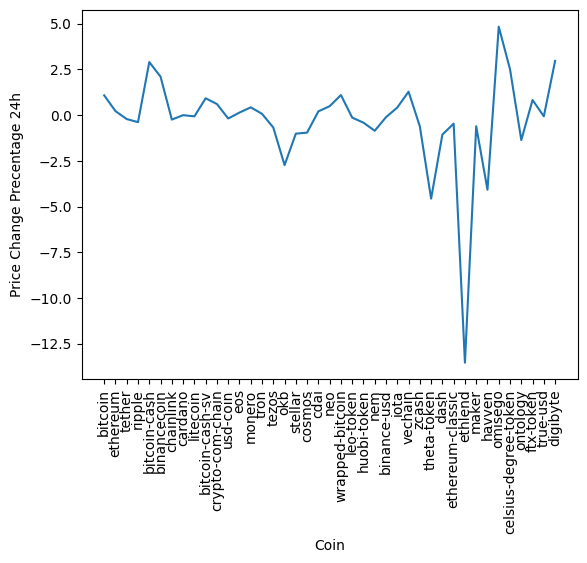

In [29]:
# Plot your data to see what's in your DataFrame
#df_market_data.hvplot.line(x="coin_id", y="price_change_percentage_24h",
#  width=800,
#  height=400,
#  rot=90
#)
plt.plot(df_market_data.index,df_market_data["price_change_percentage_24h"])
plt.xlabel("Coin")
plt.ylabel("Price Change Precentage 24h")
plt.xticks(rotation=90)
plt.show()

---

### Prepare the Data

In [11]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_df_scaled = StandardScaler().fit_transform(df_market_data[['price_change_percentage_24h','price_change_percentage_7d','price_change_percentage_14d','price_change_percentage_30d','price_change_percentage_60d','price_change_percentage_200d','price_change_percentage_1y']])

In [12]:
# Create a DataFrame with the scaled data
df_market_scaled = pd.DataFrame(market_df_scaled, columns=['price_change_percentage_24h','price_change_percentage_7d','price_change_percentage_14d','price_change_percentage_30d','price_change_percentage_60d','price_change_percentage_200d','price_change_percentage_1y'])
# Copy the crypto names from the original data
df_market_scaled.insert(0,'coin_id',df_market_data.index)
# Set the coinid column as index
df_market_scaled = df_market_scaled.set_index("coin_id")



In [13]:

# Display sample data
df_market_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [14]:
# Create a list with the number of k-values from 1 to 11
k_list = list(range(1,11))

In [15]:
# Create an empty list to store the inertia values
inertia_vals = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k_list:
    k_model = KMeans(n_clusters=i)
    k_model.fit(df_market_scaled)
    inertia_vals.append(k_model.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [54]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_list, "inertia": inertia_vals}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379


<Axes: xlabel='k'>

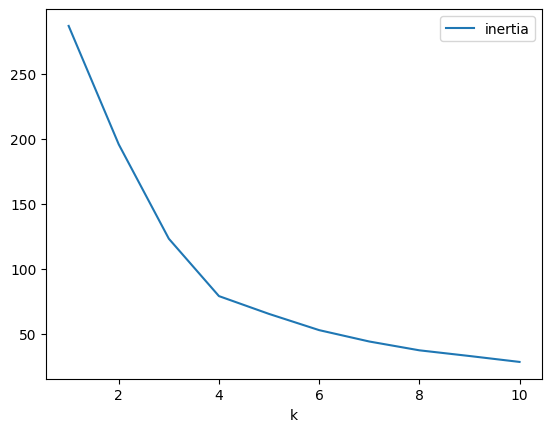

In [17]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.plot("k", "inertia")

#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [18]:
# Initialize the K-Means model using the best value for k
k3 = KMeans(n_clusters=4)

In [19]:
# Fit the K-Means model using the scaled data
k3.fit(df_market_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [20]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = k3.predict(df_market_scaled)

# Print the resulting array of cluster values.
print(crypto_clusters)

[1 1 3 3 1 1 1 1 1 3 3 3 3 1 3 1 3 3 1 3 3 1 3 3 3 3 3 3 1 3 3 3 0 1 3 3 2
 3 3 3 3]


In [21]:
# Create a copy of the DataFrame
df_market_scaled_predict = df_market_scaled.copy()

In [22]:
# Add a new column to the DataFrame with the predicted clusters
df_market_scaled_predict['CryptoClusters'] = crypto_clusters

# Display sample data
df_market_scaled_predict.sample(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,CryptoClusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
omisego,1.919812,0.370447,-1.619761,-0.409716,1.696480,0.811207,-0.021888,3
zcash,-0.127467,0.929119,0.677532,0.223834,-0.437068,-0.265163,-0.214829,1
ftx-token,0.414711,0.414044,-0.047386,-0.465380,0.128185,-0.416502,-0.145469,3
iota,0.259097,0.249508,-0.478953,-0.218997,-0.735815,-0.329179,-0.285310,3
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
wrapped-bitcoin,0.515453,0.461843,0.769975,0.224045,-0.074674,-0.355054,-0.251623,1


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

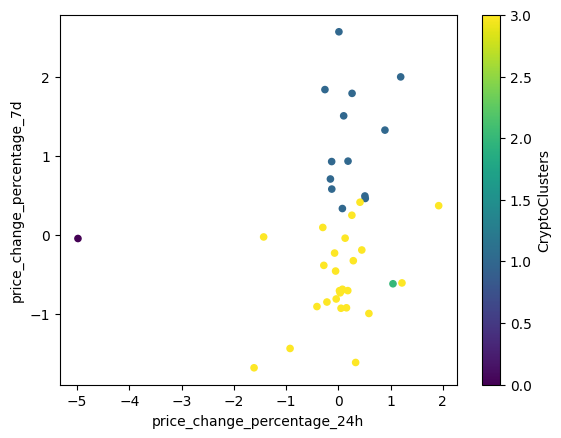

In [30]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
#df_market_scaled_predict.hvplot.scatter(x="price_change_percentage_24h",
#                                      y="price_change_percentage_7d",
#                                      by="CryptoClusters",
#                                      hover_cols="coin_id")
df_market_scaled_predict.plot.scatter(x="price_change_percentage_24h",
                                      y="price_change_percentage_7d",
                                      c='CryptoClusters',
                                      colormap='viridis'
                                      )

---

### Optimize Clusters with Principal Component Analysis.

In [31]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [32]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.
crypto_pca = pca.fit_transform(df_market_scaled)
# View the first five rows of the DataFrame.
crypto_pca[0:5, ]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [33]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:**

In [39]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(crypto_pca, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
pca_df.insert(0,'coin_id',df_market_data.index)

# Set the coinid column as index
pca_df = pca_df.set_index('coin_id')

# Display sample data
pca_df.sample(10)

,PC1,PC2,PC3
coin_id,,,
havven,0.865762,-2.261882,0.275583
neo,-0.362120,-0.986914,-0.728752
tezos,-0.796176,-0.494409,1.082812
leo-token,-0.413296,-0.674115,-1.076628
ontology,-0.632355,-2.108117,-0.652227
ftx-token,-0.593142,0.021485,0.209911
chainlink,-0.450711,0.517699,2.846143
usd-coin,-0.438408,-0.175337,-0.663388
ethlend,8.089018,-3.896891,2.301382


---

### Find the Best Value for k Using the PCA Data

In [40]:
# Create a list with the number of k-values from 1 to 11
k_list = list(range(1, 11))

In [41]:
# Create an empty list to store the inertia values
inertia_list = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k_list:
    model = KMeans(n_clusters=i)
    model.fit(pca_df)
    inertia_list.append(model.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [42]:
# Create a dictionary with the data to plot the Elbow curve
pca_elbow = {"k": k_list, "inertia": inertia_list}
# Create a DataFrame with the data to plot the Elbow curve
pca_elbow_df = pd.DataFrame(pca_elbow)

<Axes: xlabel='k'>

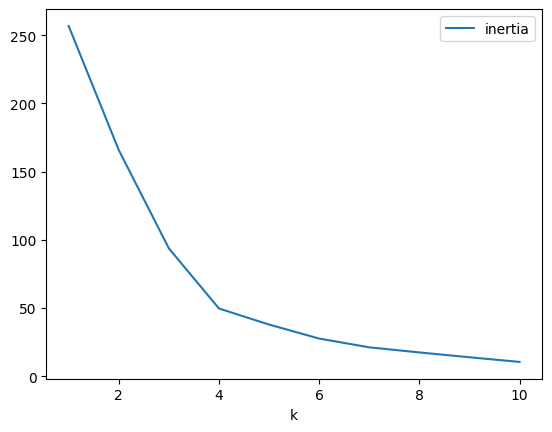

In [43]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
pca_elbow_df.plot("k", "inertia")

#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [44]:
# Initialize the K-Means model using the best value for k
k4 = KMeans(n_clusters=4)

In [45]:
# Fit the K-Means model using the PCA data
k4.fit(pca_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [46]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_4 = k4.predict(pca_df)
# Print the resulting array of cluster values.
k_4

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [49]:
# Create a copy of the DataFrame with the PCA data
crypto_pca_predictions_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
crypto_pca_predictions_df["CryptoClusters"] = k_4

# Display sample data
crypto_pca_predictions_df.sample(10)

,PC1,PC2,PC3,CryptoClusters
coin_id,,,,
ftx-token,-0.593142,0.021485,0.209911,0
bitcoin,-0.600667,0.842760,0.461595,1
litecoin,-0.649468,0.432165,0.600303,1
tron,-0.393352,-0.108192,-0.012756,0
nem,0.608974,0.563532,-1.148742,0
iota,-0.764665,-0.517886,0.204990,0
monero,0.060499,2.909404,1.498571,1
bitcoin-cash-sv,-0.759014,-0.201200,-0.217653,0
celsius-degree-token,4.792395,6.767679,-1.986985,3


<Axes: xlabel='PC1', ylabel='PC2'>

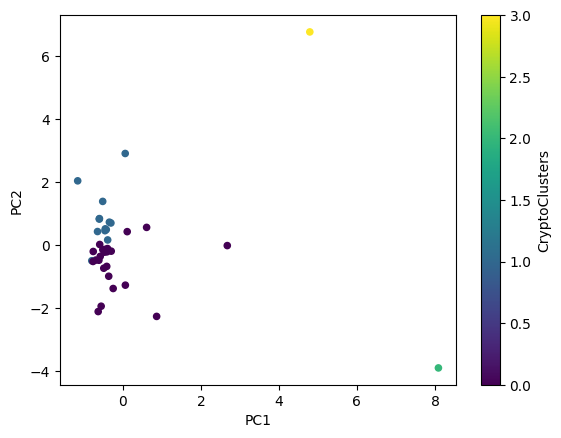

In [50]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
crypto_pca_predictions_df.plot.scatter(x="PC1",
                                      y="PC2",
                                      c='CryptoClusters',
                                      colormap='viridis'
                                      )

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

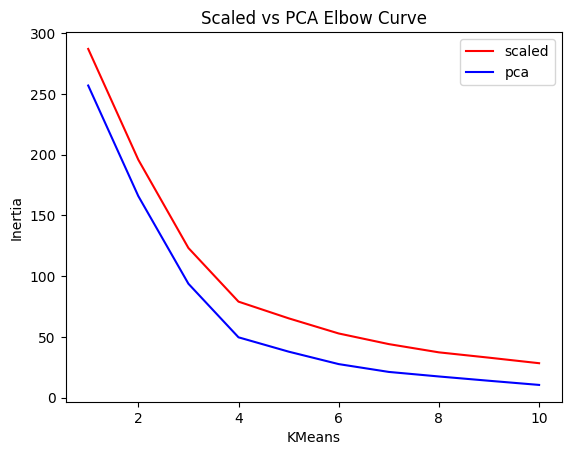

In [65]:
# Composite plot to contrast the Elbow curves
x = elbow_comp_df['k']
y = elbow_comp_df['inertia']
z = pca_elbow_df['inertia']
plt.plot(x, y, color ='r', label='scaled')
plt.plot(x,z, color= 'b', label='pca')
plt.xlabel("KMeans")
plt.ylabel("Inertia")
plt.title("Scaled vs PCA Elbow Curve")
plt.legend()
plt.show()

In [ ]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!


#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**